In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.integrate as integrate
import scipy.optimize as optimization

from datetime import datetime

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.linewidth': 1.2})
plt.rcParams.update({'xtick.major.width': 1.2})

# Redshift distribution informations

In [2]:
## Zhang (2022) data:

z_ph_m = z0 = 0.24
z_min  = 0.2
z_max  = 1.2
n_mean = 35.70
z0     = 0.24
alpha  = 0.90

## Gaussian informations
sig = 0.03
Delta  = 0.

## Calculating the redshift ranges for each bin (real redshift)

zi_min = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]
zi_max = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

dates = []
nuHI = 1420.40575177
for i in range(0,31,1):
  print('bin '+str("{:2.0f}".format(30-i))+', $\\nu$ = '+str("{:4.0f}".format(980 + i*((1260-980)/30)))+', $\Delta \\nu$  = '+str("{:.3f}".format((i+1)*((1260-980)/30) - i*((1260-980)/30)))+', z = '+str("{:.3f}".format(nuHI/(980 + i*((1260-980)/30)) - 1))+', $\\Delta$ z  = '+str("{:.3f}".format(nuHI/(980 + (i-1)*((1260-980)/30)) - nuHI/(980 + i*((1260-980)/30)))))
  dates.append(nuHI/(980 + i*((1260-980)/30)) - 1)
print(len(dates))
print(len(dates) - len(np.linspace(980.,1260.,31)))

bin 30, $\nu$ =  980, $\Delta \nu$  = 9.333, z = 0.449, $\Delta$ z  = 0.014
bin 29, $\nu$ =  989, $\Delta \nu$  = 9.333, z = 0.436, $\Delta$ z  = 0.014
bin 28, $\nu$ =  999, $\Delta \nu$  = 9.333, z = 0.422, $\Delta$ z  = 0.013
bin 27, $\nu$ = 1008, $\Delta \nu$  = 9.333, z = 0.409, $\Delta$ z  = 0.013
bin 26, $\nu$ = 1017, $\Delta \nu$  = 9.333, z = 0.396, $\Delta$ z  = 0.013
bin 25, $\nu$ = 1027, $\Delta \nu$  = 9.333, z = 0.384, $\Delta$ z  = 0.013
bin 24, $\nu$ = 1036, $\Delta \nu$  = 9.333, z = 0.371, $\Delta$ z  = 0.012
bin 23, $\nu$ = 1045, $\Delta \nu$  = 9.333, z = 0.359, $\Delta$ z  = 0.012
bin 22, $\nu$ = 1055, $\Delta \nu$  = 9.333, z = 0.347, $\Delta$ z  = 0.012
bin 21, $\nu$ = 1064, $\Delta \nu$  = 9.333, z = 0.335, $\Delta$ z  = 0.012
bin 20, $\nu$ = 1073, $\Delta \nu$  = 9.333, z = 0.323, $\Delta$ z  = 0.012
bin 19, $\nu$ = 1083, $\Delta \nu$  = 9.333, z = 0.312, $\Delta$ z  = 0.011
bin 18, $\nu$ = 1092, $\Delta \nu$  = 9.333, z = 0.301, $\Delta$ z  = 0.011
bin 17, $\nu

# Galaxy distribution per arcmin^2

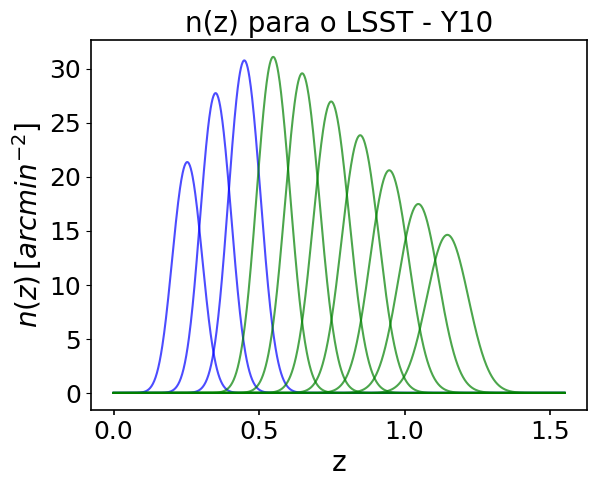

In [3]:
def nx_zph1(zph):
    return (zph**2) * np.exp(-1. * ((zph/z0)**alpha))

I = integrate.quad(nx_zph1, z_min, z_max)[0]
n_adj = n_mean/I


def nx_zph(zph):
    return n_adj * (zph**2) * np.exp(-1. * ((zph/z0)**alpha))
    
## Galaxy distribution per redshift bin

zmin1 = zi_min
zmax1 = zi_max
sig_zx = sig

## Integrating for each bin
def nxi_z_integrando(zph, zreal):

    int1 = nx_zph(zph) / (np.sqrt(2 * np.pi) * sig_zx * (1 + zph))
    int2 = np.exp(-1. * ((zreal - zph - Delta)**2) / (2 * ((sig_zx * (1 + zph))**2)))
    return int1*int2


## Integrating on the photo-z for each bin
def nxi_z(zreal,zminimo,zmaximo):
    return integrate.quad(nxi_z_integrando, zminimo, zmaximo, args=(zreal))[0]


## Writing nz0_z as a vector
nxi_z = np.vectorize(nxi_z)

mu_gaussiano  = []
sig_gaussiano = []

y = np.linspace(0,1.55,1000)

## Ploting all the bins
for i in range(len(zmin1)):
  plt.title('n(z) para o LSST - Y10',fontsize=20)
  plt.xlabel("z",fontsize=20)
  plt.ylabel("$n(z)\,[arcmin^{-2}]$",fontsize=20)
  if zmin1[i]<=0.4:
    plt.plot(y, nxi_z(y,zmin1[i],zmax1[i]), 'b-', alpha=0.7)
  else:
    plt.plot(y, nxi_z(y,zmin1[i],zmax1[i]), 'g-', alpha=0.7)

  mu_gaussiano.append(zmin1[i]+(zmax1[i] - zmin1[i])/2)
  sig_gaussiano.append(zmax1[i] - mu_gaussiano[i])
plt.show()

# Comparing BINGO z-bins and Vera Rubin photo-z bins

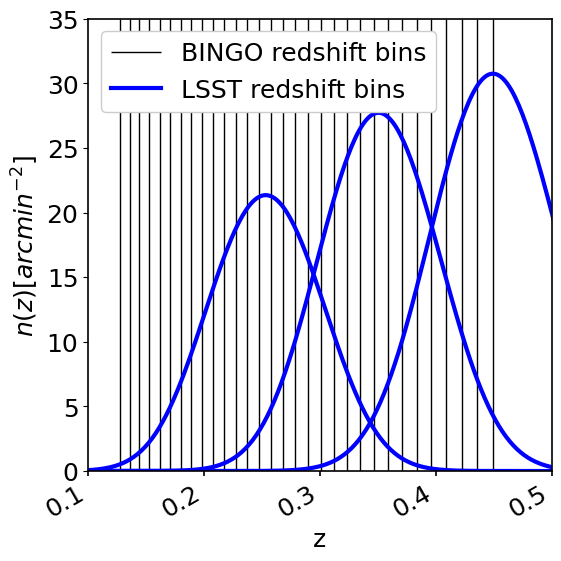

In [4]:
dates_LSST = [0.2, 0.25, 0.35, 0.45, 1.2]
levels_LSST = np.tile([0, 0, 0, 0, 0, 0],
                 int(np.ceil(len(dates_LSST)/6)))[:len(dates_LSST)]
levels = np.tile([35, 35, 35, 35, 35, 35],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(5.5, 5.5), layout="constrained")

ax.vlines(dates, 0, levels, color="black", linestyle='-', lw = 1, label = 'BINGO redshift bins')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

first_plot = True
for i in range(len(zmin1)):
    plt.xlabel("z")
    plt.ylabel("$n(z)\,[arcmin^{-2}]$")
    if zmin1[i] <= 0.4:
        label = 'LSST redshift bins' if first_plot else None
        plt.plot(y, nxi_z(y, zmin1[i], zmax1[i]), 'b-', lw=3, alpha=1, label=label)
        first_plot = False

    mu_gaussiano.append(zmin1[i] + (zmax1[i] - zmin1[i]) / 2)
    sig_gaussiano.append(zmax1[i] - mu_gaussiano[i])

plt.xlabel("z")
plt.xlim(0.1,0.5)
plt.ylim(0,35)
plt.ylabel("$n(z) [arcmin^{-2}]$")
plt.legend(loc='upper left')

leg = plt.legend(loc='upper left')
leg.get_frame().set_facecolor('white')   # Fundo branco opaco
leg.get_frame().set_alpha(1)             # Totalmente opaco

plt.show()